In [1]:
# Load libraries and increase dpi of charts
import pandas as pd
import matplotlib as mpl
from statsmodels.graphics.gofplots import qqplot
mpl.rcParams['figure.dpi'] = 360

In [2]:
# Load data
df = pd.read_csv('beer_reviews.csv')

In [3]:
# Display head of the df
df.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [4]:
# Let's get the basic summary of the data
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


Scale on which beer is reviewed seems to be from 0 or 1 to 5. Since less review features has minimum set to 0, let's see the counts of distinct values in order to see whether 0 values are not mistakes. 

In [5]:
# Count of distinct values for review_overall and review_appearance
display(df['review_overall'].value_counts())
display(df['review_appearance'].value_counts())

4.0    582764
4.5    324385
3.5    301817
3.0    165644
5.0     91320
2.5     58523
2.0     38225
1.5     12975
1.0     10954
0.0         7
Name: review_overall, dtype: int64

4.0    674186
3.5    318529
4.5    288108
3.0    166009
5.0     65398
2.5     39493
2.0     25414
1.5      6147
1.0      3323
0.0         7
Name: review_appearance, dtype: int64

0 rate reviews, based on their volume are most likely errors, let's fix this. 

In [6]:
df[['review_overall','review_appearance']] = df[['review_overall','review_appearance']].replace({0:1})

Once we fixed the most obvious errors, let's try to answer first question:

### Which brewery produces the strongest beers by abv?

In [7]:
df.groupby(by = 'brewery_name',as_index = False).agg({'beer_abv':'max'}).sort_values(by = 'beer_abv', ascending = False).head(10)

,brewery_name,beer_abv
4667,Schorschbräu,57.70
1182,BrewDog,41.00
1897,De Struise Brouwers,39.00
2544,Hair of the Dog Brewing Company / Brewery and ...,29.00
701,Boston Beer Company (Samuel Adams),27.00
3185,LagerHaus Grill & Brewery,22.00
2002,DuClaw Brewing Company,21.92
4733,Short's Brewing Company,20.00
2436,Grand Lake Brewing Company,20.00
4819,Sonoran Brewing Company,19.50


After I googled that such a high % alcohol content in beer is not wrong (the current record holder has 67.5%), it can be concluded that among the breweries analyzed, <b>Schorschbräu</b> produces the strongest beers. Since we know it, let me try to answer on the second question:

### If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

In [8]:
import numpy as np

In [9]:
# Let's calculate number of reviews per beer
num_or_rev = df[['beer_beerid']].value_counts()

# check the distribution of number of reviews
num_or_rev.describe()

count    66055.000000
mean        24.019590
std        110.864191
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max       3290.000000
dtype: float64

Majority of the beers has only couple of reviews, thus calculating average would be very bad idea, as results would be heavily skewed by number of reviews per beer (1 review vs 3290!)

First recommended beer would be the one with the most reviews:

In [10]:
df.groupby(by = 'beer_name',as_index = False).agg({'beer_beerid':'count'}).sort_values(by = 'beer_beerid', ascending = False).head(1)

,beer_name,beer_beerid
900,90 Minute IPA,3290


Can 100 people be wrong? Possibly, but 1000 certainly not. Let's calculate average rating for beers with at least 1000 reviews and recommend extremes, i.e., the best and worst rated beers. 

In [11]:
# Check the number of beers with at least 1000 reviews
print("Number of beers with at least 1000 reviews: {}".format(sum(df[['beer_beerid']].value_counts() > 1000)))

Number of beers with at least 1000 reviews: 199


In [12]:
# Save them to series 
at_least_1000_rev = (df[['beer_beerid']].value_counts() > 1000)
# Convert to df
at_least_1000_rev = at_least_1000_rev.reset_index()
# Add proper colnames
at_least_1000_rev.columns = ['beer_beerid','flag']
# Keep only beers with at least 1000 reviews
at_least_1000_rev = at_least_1000_rev[at_least_1000_rev['flag'] == True]
# Convert to list
at_least_1000_rev_list = at_least_1000_rev['beer_beerid'].values.tolist()
# Filter the original dataset based on this list
df_filtered = df.query('beer_beerid in @at_least_1000_rev_list')

As we have beers with at least 1000 reviews we need to calculate average score for them:

In [13]:
# Calculate average rating per feature
df_ratings = df_filtered.groupby(by = 'beer_name',as_index = False)[['review_overall','review_aroma','review_appearance','review_palate',
                                                          'review_taste']].mean()
# Calculate average total rating per beer
df_ratings['average_score'] = df_ratings.select_dtypes(include='number').sum(axis = 1)

# Sort by average_score
df_ratings.sort_values(by = 'average_score', inplace = True)

# Display the results
display(df_ratings)

,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,average_score
30,Bud Light,2.422043,1.747312,2.011521,1.948541,1.828725,9.958141
39,Coors Light,2.576491,1.844425,2.001296,2.026793,1.974071,10.423077
40,Corona Extra,2.608120,1.950274,2.291058,2.300639,2.187500,11.337591
102,Miller Lite,2.758318,2.007394,2.349815,2.260166,2.208872,11.584566
31,Budweiser,2.883995,2.189644,2.516476,2.473100,2.420309,12.483524
...,...,...,...,...,...,...,...
177,Supplication,4.431624,4.431624,4.291548,4.377018,4.566002,22.097816
61,Founders KBS (Kentucky Breakfast Stout),4.397516,4.570393,4.377070,4.479814,4.626294,22.451087
179,The Abyss,4.450779,4.443343,4.593484,4.513102,4.588173,22.588881
119,Pliny The Elder,4.590028,4.612188,4.388603,4.451326,4.630985,22.673130


3 beers that I would recommend are:
* 90 Minute IPA – Most popular
* Bud Light – Worst rated 
* Trappist Westvleteren 12 – Best rated

### What are the factors that impacts the quality of beer the most ?

In the dataset there is no "quality" feature which would much simplify answering the question, I will allow myself to use a feature average_score which I created in the last section. I think it can be a pretty good indicator of beer quality, assuming that the higher the quality of a beer is associated with a higher average rating for that beer (which is a pretty safe assumption).   

To answer the question about what factors impact the quality of beer the most I will check the correlation between the rewiews and average score. Feature with highest absolute coefficient of variation, will be the one impacting the quality of beer the most. 

One of the main assumptions of Pearson correllation coeffcient is normal distribution of analyzed features. If this condition will not be met I will have to use Spearman correlation coefficient instead. As the data sample is quite small, I can use the most widely known normality test i.e. Shapiro-Wilk Test.

In [14]:
from scipy.stats import shapiro

# Define function for running this test
def norm_test(df):
    stat, p = shapiro(df)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [15]:
# Check the normality for each of the city, note that I need to remove missing values because test itself does not handle those
print('review_overall:')
norm_test(df_ratings['review_overall'].dropna())

print('review_aroma:')
norm_test(df_ratings['review_aroma'].dropna())

print('review_appearance:')
norm_test(df_ratings['review_appearance'].dropna())

print('review_palate:')
norm_test(df_ratings['review_palate'].dropna())

print('review_taste:')
norm_test(df_ratings['review_taste'].dropna())

print('average_score:')
norm_test(df_ratings['average_score'].dropna())

review_overall:
Statistics=0.847, p=0.000
Sample does not look Gaussian (reject H0)
review_aroma:
Statistics=0.797, p=0.000
Sample does not look Gaussian (reject H0)
review_appearance:
Statistics=0.753, p=0.000
Sample does not look Gaussian (reject H0)
review_palate:
Statistics=0.801, p=0.000
Sample does not look Gaussian (reject H0)
review_taste:
Statistics=0.798, p=0.000
Sample does not look Gaussian (reject H0)
average_score:
Statistics=0.781, p=0.000
Sample does not look Gaussian (reject H0)


By running this test, and looking at the reults, we can assume that the data does not come from the normal distribution, but let's make sure by using another form of confirmation which can be for example QQ plots. 

review_overall:


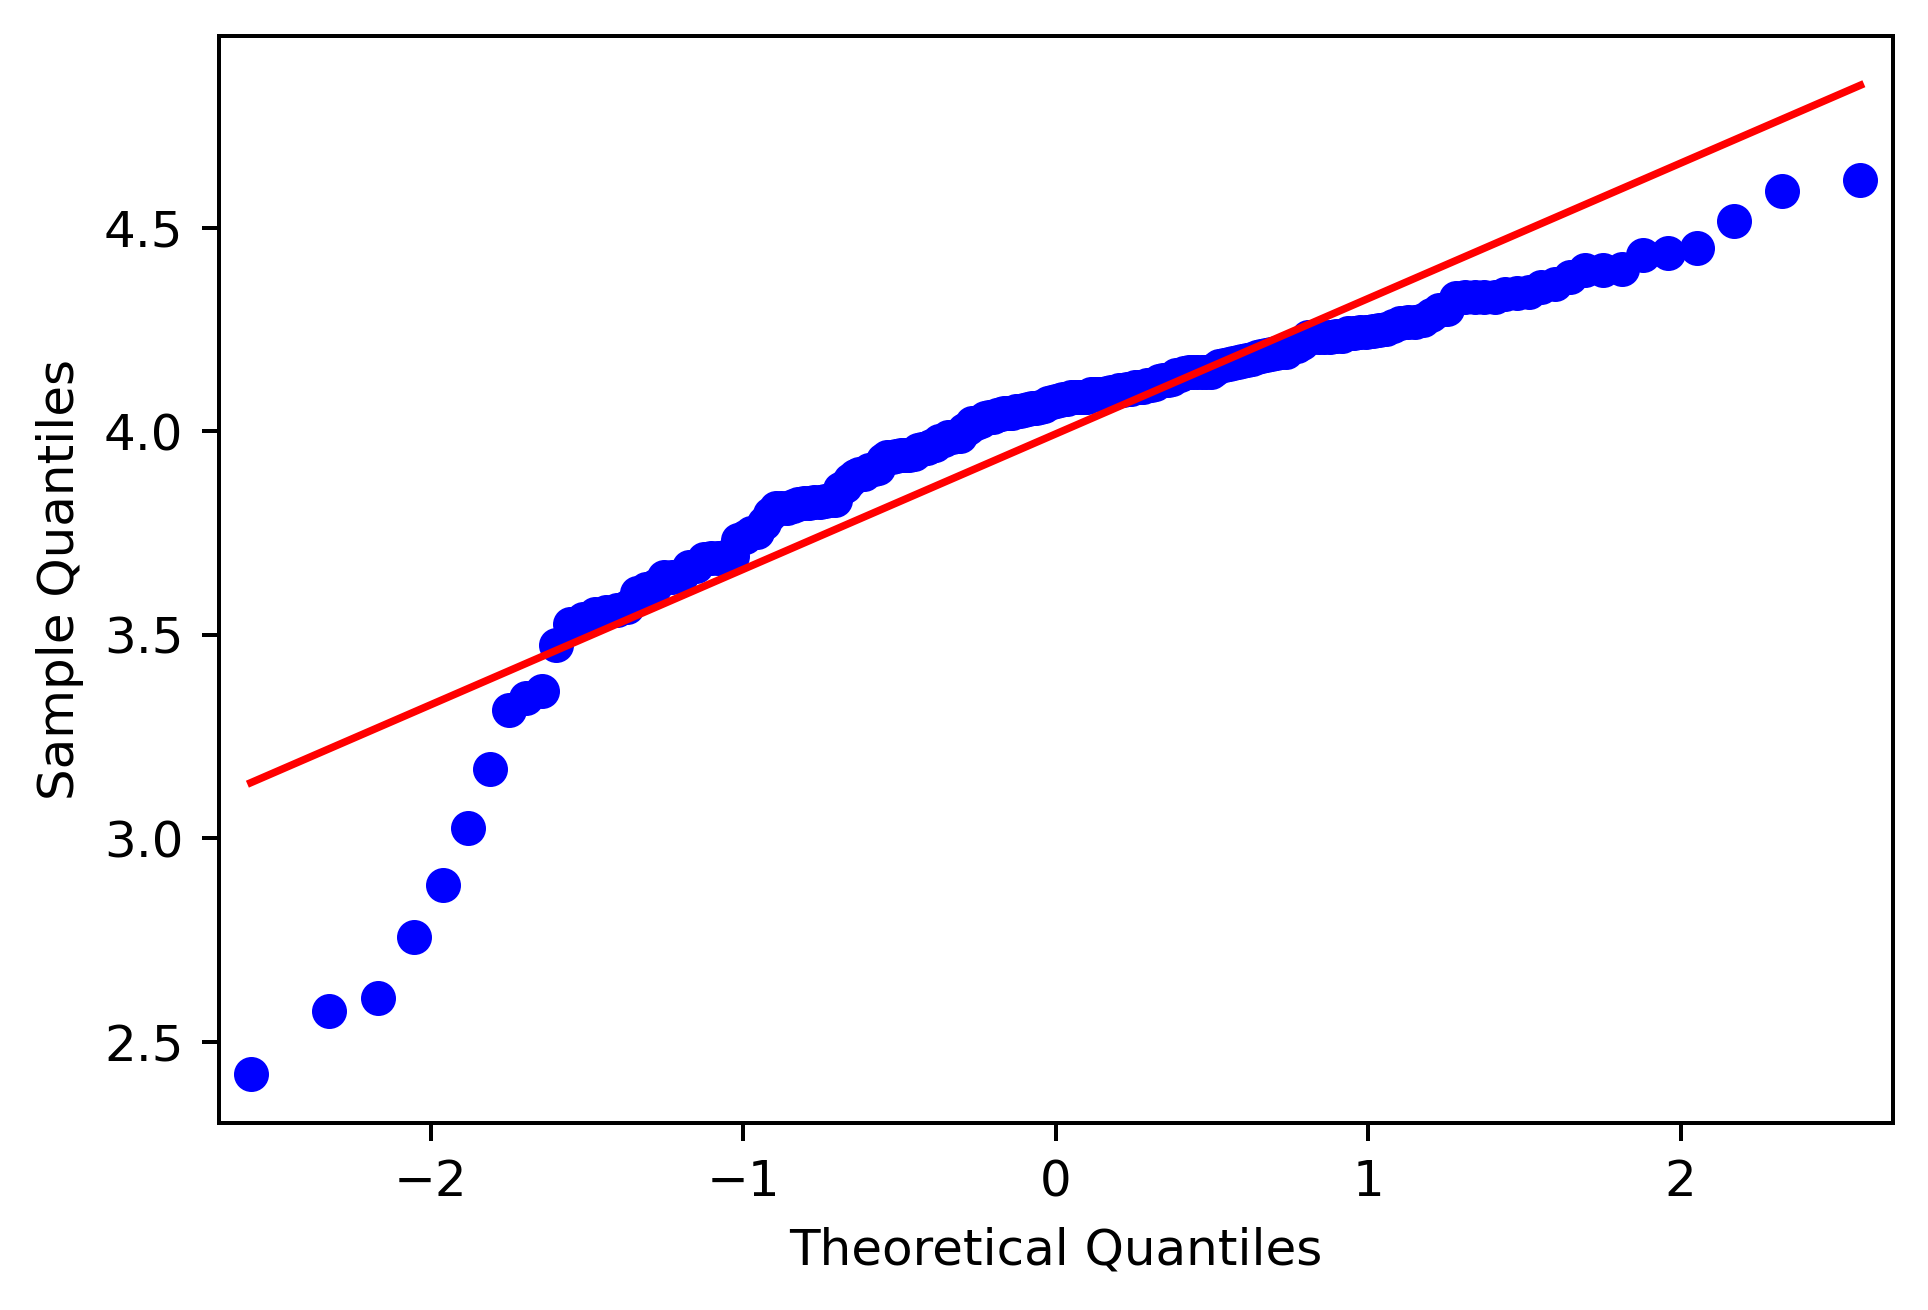

review_aroma:


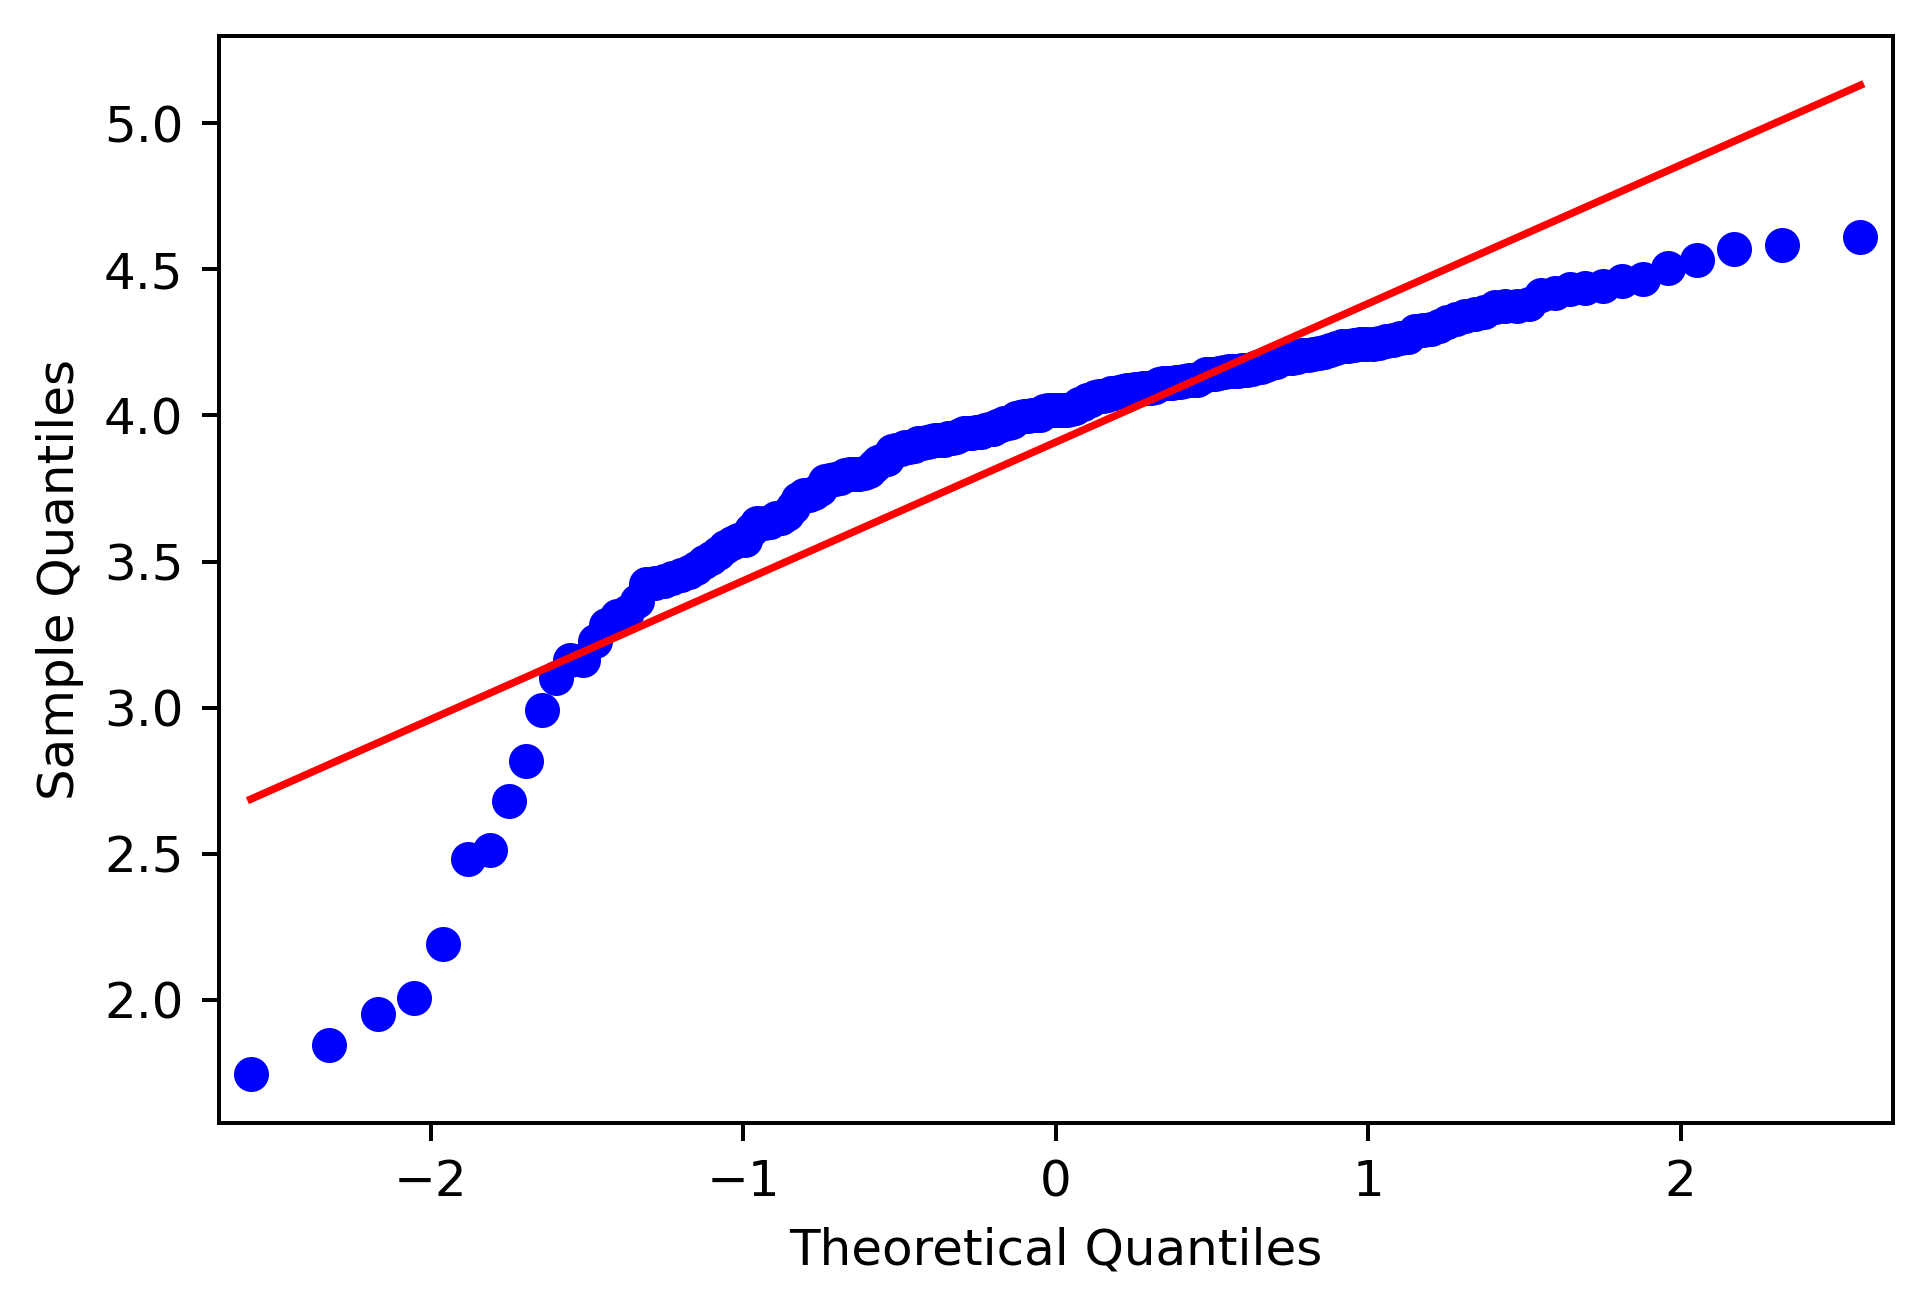

review_appearance:


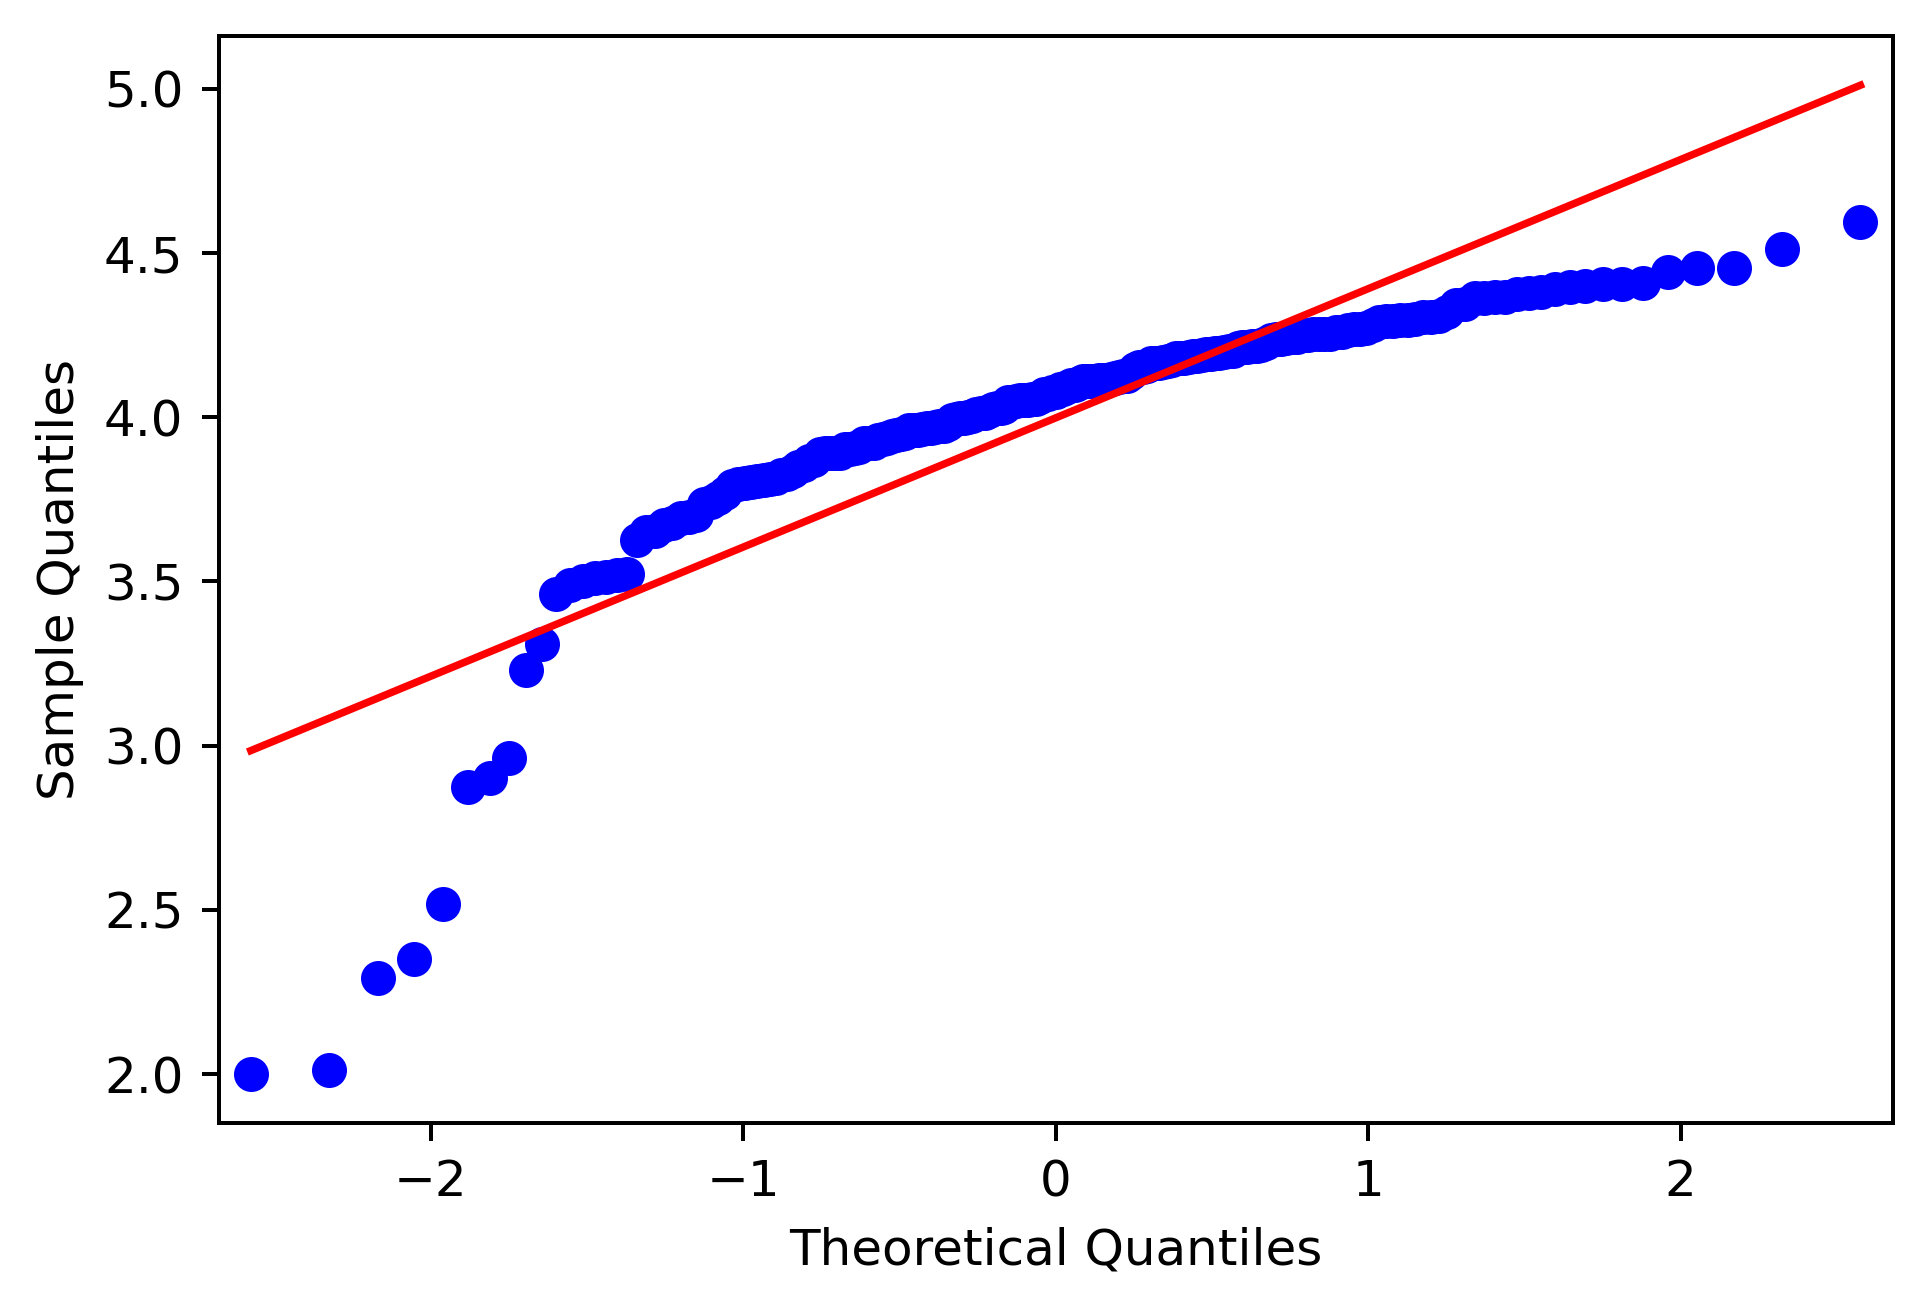

review_palate:


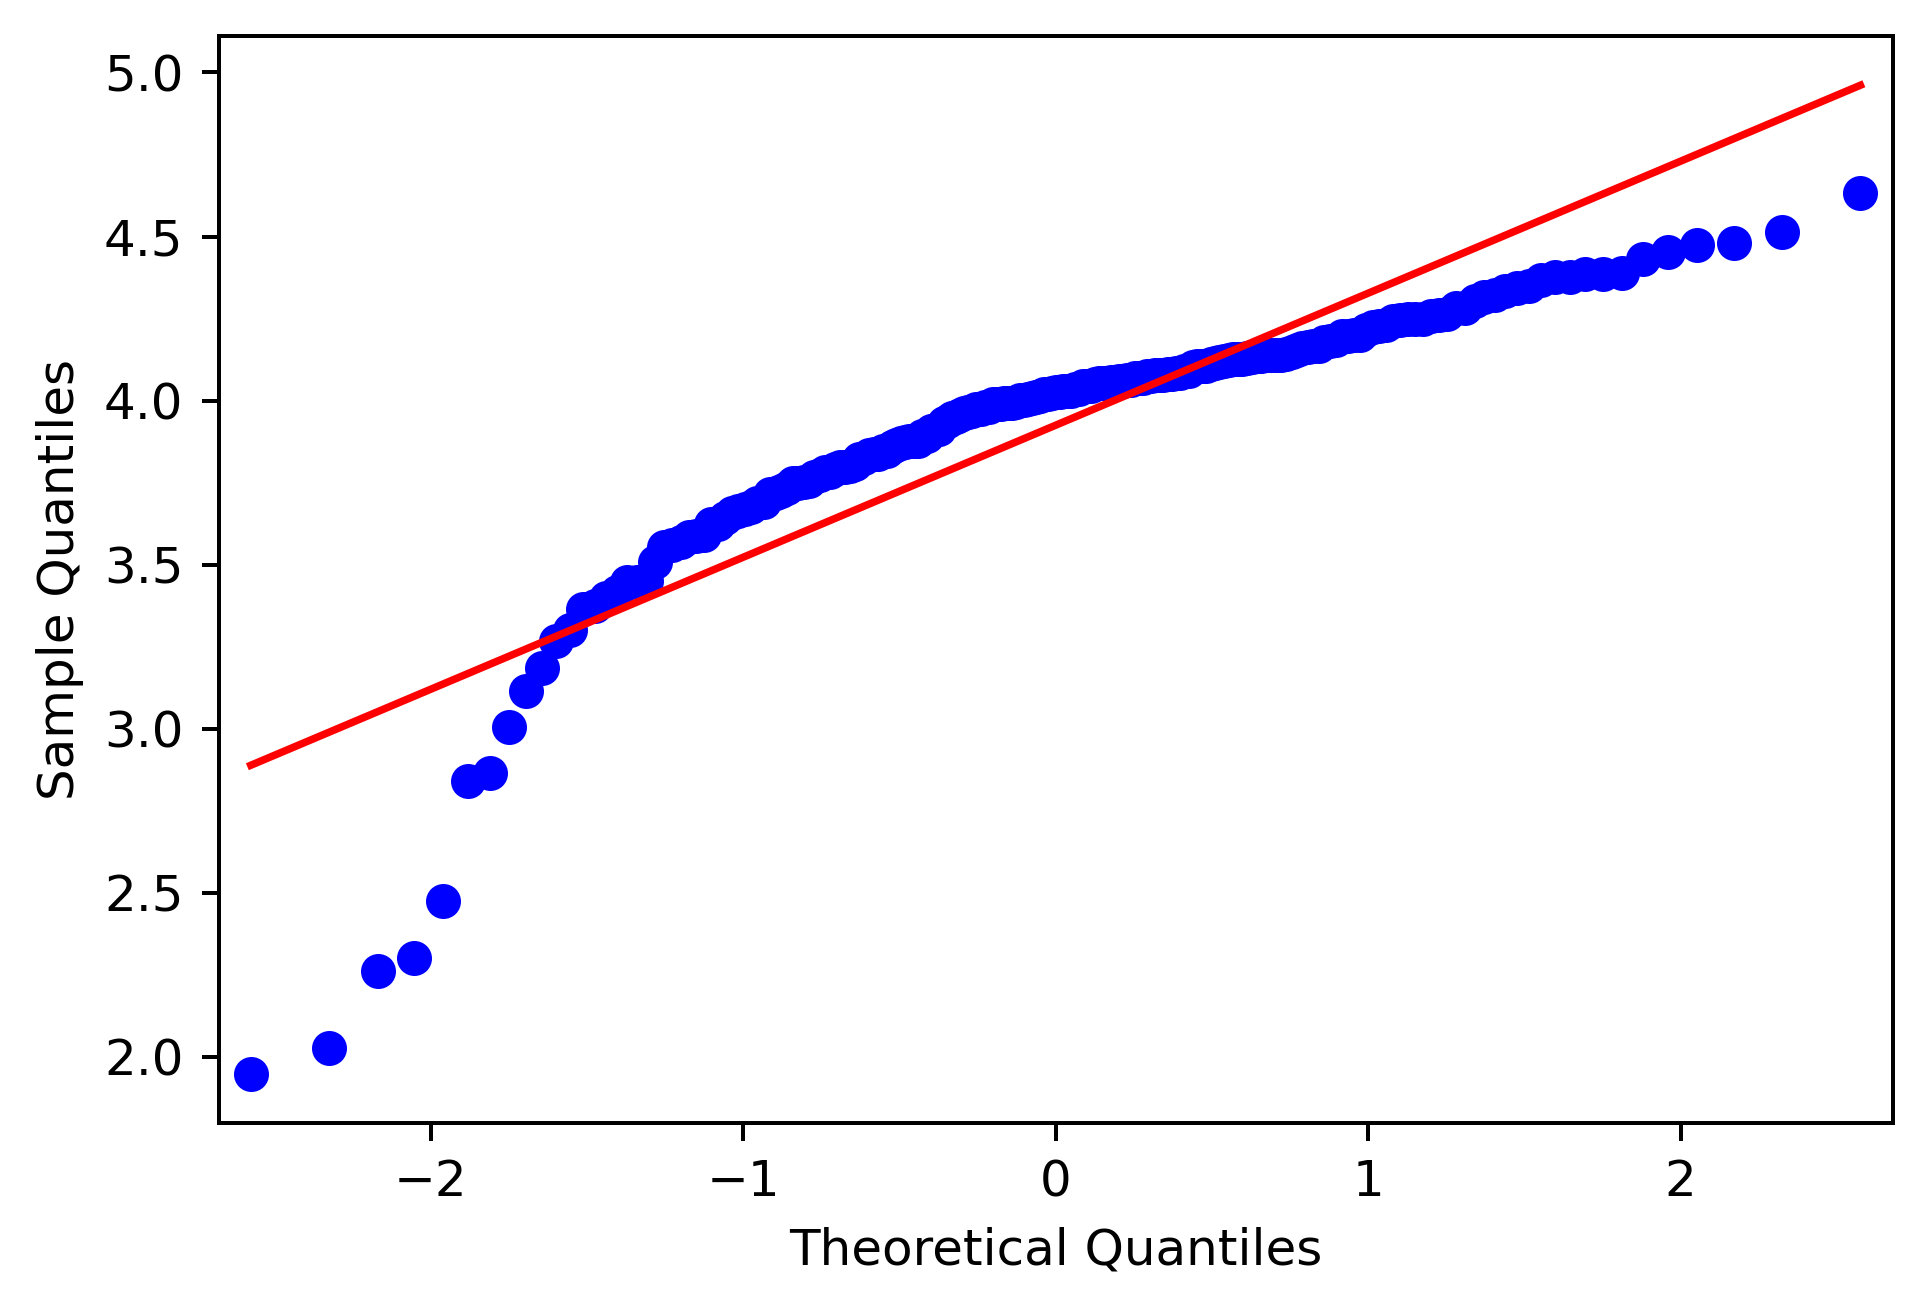

review_taste:


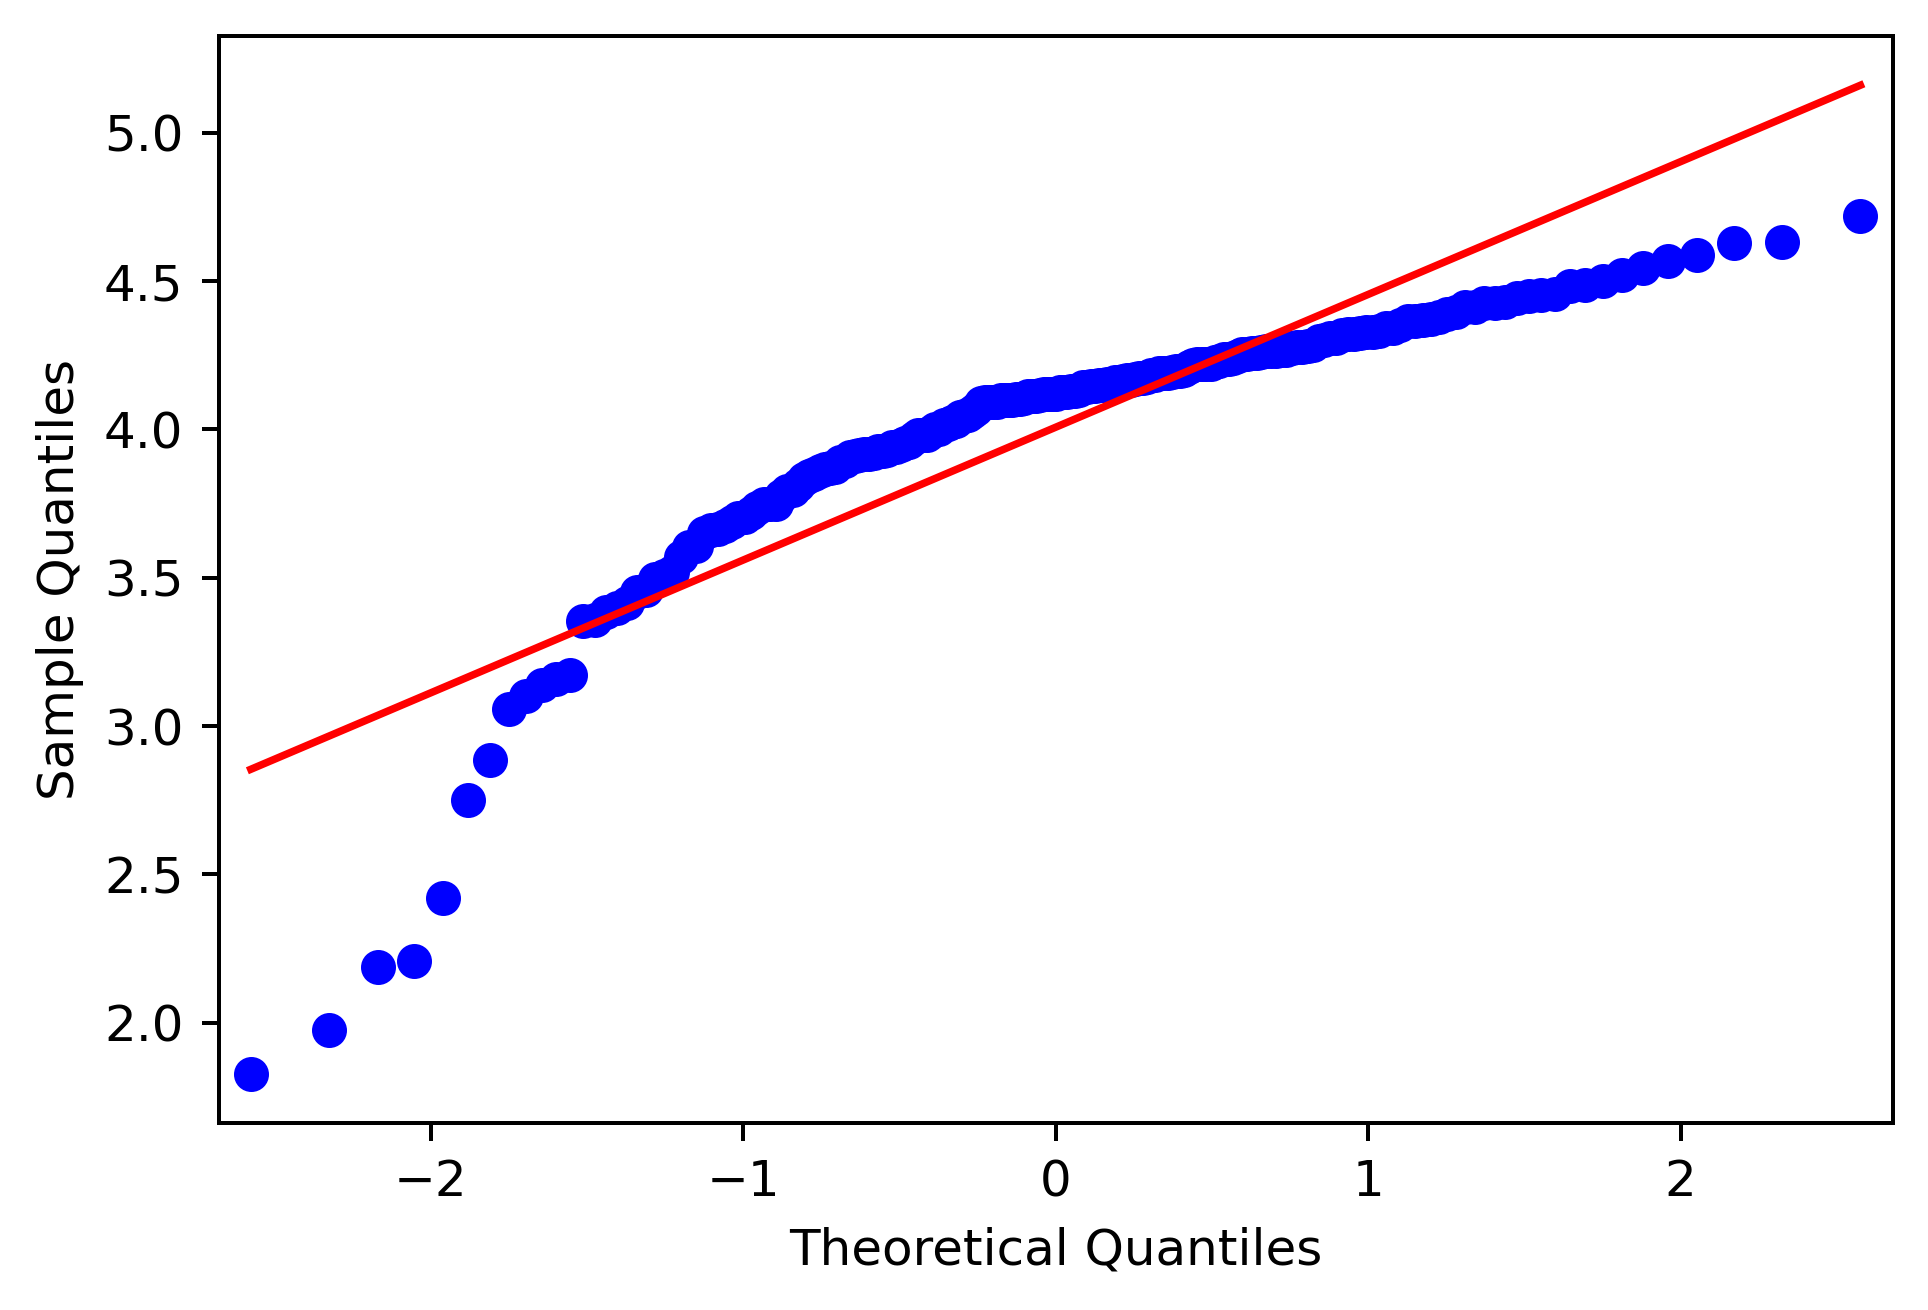

average_score:


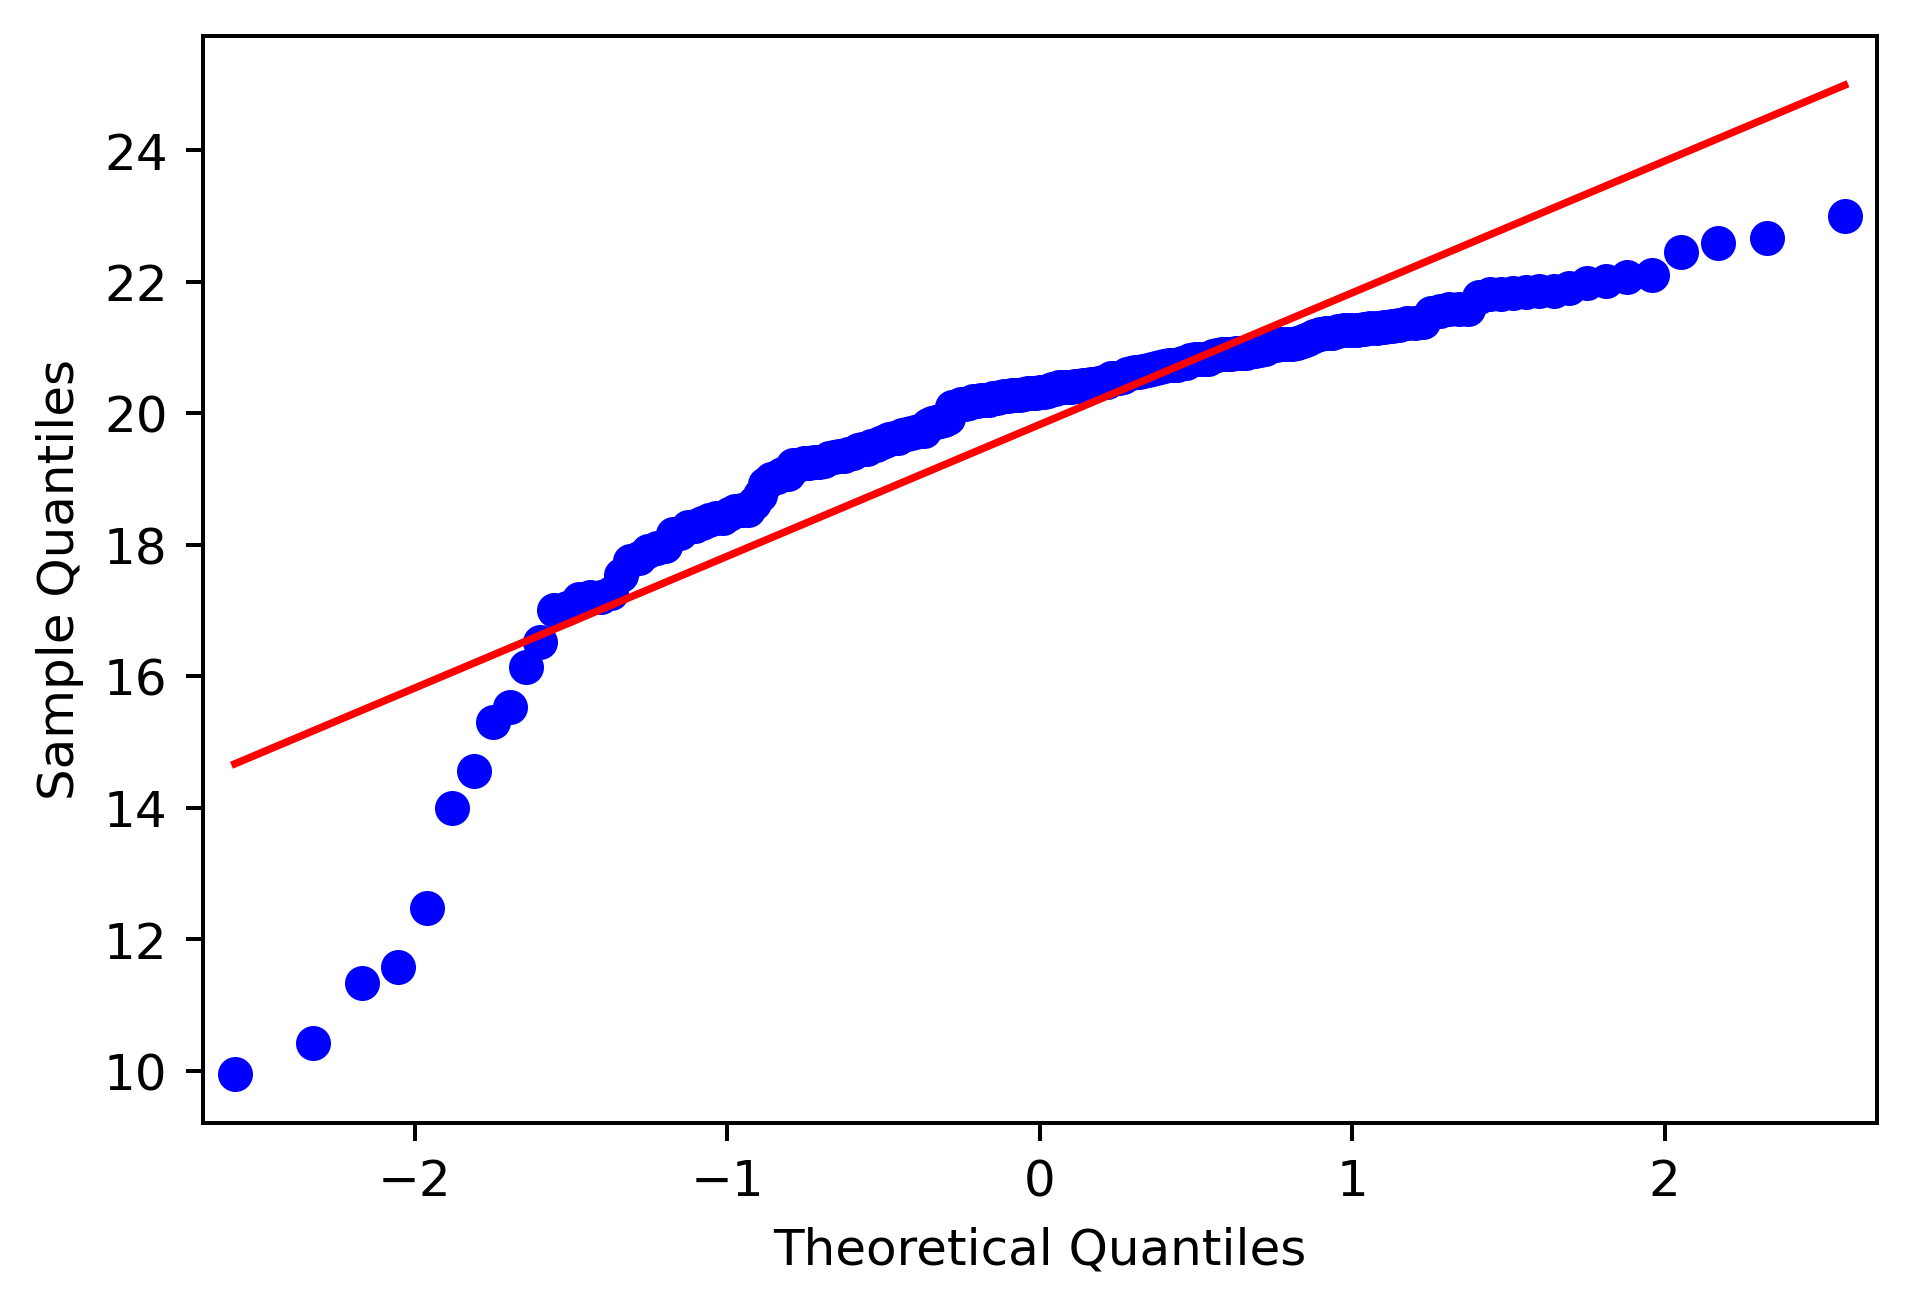

In [16]:
print('review_overall:')
qqplot(df_ratings['review_overall'].dropna(), line='s')
mpl.pyplot.show()

print('review_aroma:')
qqplot(df_ratings['review_aroma'].dropna(), line='s')
mpl.pyplot.show()

print('review_appearance:')
qqplot(df_ratings['review_appearance'].dropna(), line='s')
mpl.pyplot.show()

print('review_palate:')
qqplot(df_ratings['review_palate'].dropna(), line='s')
mpl.pyplot.show()

print('review_taste:')
qqplot(df_ratings['review_taste'].dropna(), line='s')
mpl.pyplot.show()

print('average_score:')
qqplot(df_ratings['average_score'].dropna(), line='s')
mpl.pyplot.show()

Looking at the results of the QQ plots and Shapiro-Wilk Test test we can safely assume that the data does have the normal distribution thus I need to use Spearman correlation coefficient

In [17]:
# Calculate the correlation coefficient
df_ratings.corr(method = 'spearman').tail(1)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,average_score
average_score,0.876926,0.941882,0.915228,0.982289,0.987856,1.0


As we see, there is a very high positive correlation or almost full positive correlation between average_score and review based features. This was somehow expected as average score is based on those reviews, but two features with the highest Spearman coefficient correlation have value very close to 1. Taking into account these numbers I would say that <b>taste and palete of beer are the factors which impact the quality of beer the most</b>. 

### I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

What does it mean that beer aroma and appearance matches the beer style? Well with this one I will have to make a lot of assumptions. But my general idea is that I am going to calculate average aroma and appearance for each beer style. Next I will calculate average aroma and appearance for each beer and I will recommend couple of beers which average aroma and appearance will be the closest to the average aroma and appearance for certain beer style. Let's do this! 

In [18]:
# Calculate average aroma and appearance for each beer style
avg_style = df.groupby(by = 'beer_style',as_index = False)[['review_aroma','review_appearance']].mean()
avg_style.columns = ['beer_style','avg_review_aroma', 'avg_review_appearance']
display(avg_style)

,beer_style,avg_review_aroma,avg_review_appearance
0,Altbier,3.624015,3.809327
1,American Adjunct Lager,2.480211,2.788546
2,American Amber / Red Ale,3.627254,3.810212
3,American Amber / Red Lager,3.213296,3.527494
4,American Barleywine,4.019343,4.036535
...,...,...,...
99,Vienna Lager,3.434108,3.698347
100,Weizenbock,4.044677,4.009297
101,Wheatwine,3.969036,3.907108
102,Winter Warmer,3.707178,3.844635


In [19]:
# Calculate average aroma and appearance for each beer 
avg_beer = df.groupby(by = ['beer_name','beer_style'],as_index = False)[['review_aroma','review_appearance']].mean()
display(avg_beer)

,beer_name,beer_style,review_aroma,review_appearance
0,! (Old Ale),Old Ale,4.5,4.00
1,"""100""",Belgian Dark Ale,4.0,4.00
2,"""100"" Pale Ale",American IPA,4.0,3.50
3,"""12"" Belgian Golden Strong Ale",Belgian Strong Pale Ale,3.5,4.25
4,"""33"" Export",Dortmunder / Export Lager,3.0,3.00
...,...,...,...,...
58887,Žamberecký Kanec Imperial Stout,Russian Imperial Stout,4.5,4.50
58888,Ω-naught (Omeganaught),American IPA,4.0,4.00
58889,“Chewy” Double IPA,American IPA,2.0,4.00
58890,横須賀ビアサケ (Yokosuka Biasake),English Bitter,3.5,3.00


In [20]:
# Calculate difference between average aroma and appearance for each beer style and corresponding beers.
res_df = pd.DataFrame()
for index, row in avg_style.iterrows():
    # Save variables 
    style = row['beer_style']
    aroma = row['avg_review_aroma']
    appearance = row['avg_review_appearance']
    
    # Pull only the beers with matching beer_style
    beers = avg_beer.query('beer_style in @style').copy()
    # Calculate difference between average aroma and appearance of style and beers within this style
    beers['ar_ap_match'] = abs(beers['review_aroma']-aroma) + abs(beers['review_appearance']-appearance)
    # Pull the ones with the smallest absolute differences
    res_tmp = beers[beers['ar_ap_match'] == beers['ar_ap_match'].min()]
    # Save results to res_df
    res_df = res_df.append(res_tmp)

In [21]:
res_df.sort_values(by = 'ar_ap_match')

,beer_name,beer_style,review_aroma,review_appearance,ar_ap_match
27703,JP (2009),Dubbel,3.900000,4.000000,0.000390
9956,Brooklyn Smoked Porter,American Porter,3.833333,3.958333,0.004074
3569,Ausable Wulff Red Ale,American Amber / Red Ale,3.625000,3.812500,0.004542
57696,Witch City Red,American Amber / Red Ale,3.625000,3.812500,0.004542
7476,Black Wheat,American Dark Wheat Ale,3.500000,3.666667,0.004762
...,...,...,...,...,...
27894,Jalapeño Pepper Ale,Chile Beer,3.214286,3.357143,0.095832
47252,Shizuku,Happoshu,2.625000,3.000000,0.104253
36525,Nicola,Kvass,3.300000,3.350000,0.164815
36509,Nickel Brook Sahti Juniper Beer,Sahti,3.666667,3.666667,0.172008


Now as I have candidates for being recommended, I just want to make sure that for each beer style we have denect number of reviews based on which average aroma and appearance were calculated

In [22]:
df['beer_style'].value_counts()

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_style, Length: 104, dtype: int64

For each beer style there is at least 241 reviews, looks like a trustworthy number thus I can reccomend the beer with the smallest difference between average appearance and aroma of certain beer and style. <b>So if someone likes beer which aroma and appearance match its style I would reccomend JP (2009).</b>